In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
from Iterative_solvers_l0_l1 import *

In [2]:
X_APR    = loadtxt('Burgers/X_burgers.dat', dtype='double')
T_APR    = loadtxt('Burgers/T_burgers.dat', dtype='double') 

data = sio.loadmat('Burgers/burgers.mat')
u = real(data['usol'])
dx = X_APR[1] - X_APR[0]
dt = T_APR[1] - T_APR[0]
print(" shape of u ", u.shape)

print(" dt is ", dt, " dx is ", dx)
print(" shape of u ", u.shape)

 shape of u  (256, 101)
 dt is  0.1  dx is  0.0625
 shape of u  (256, 101)


Text(0.5,0,'t')

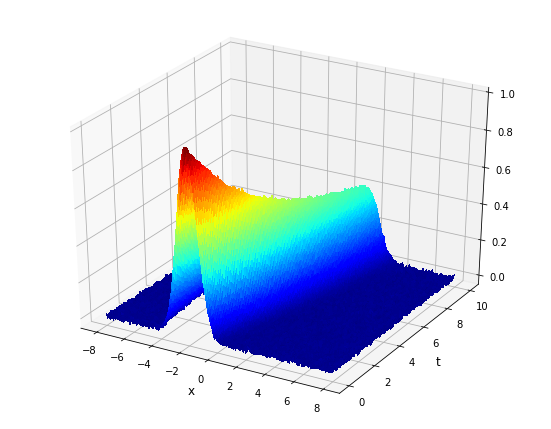

In [6]:
pylab.rcParams['figure.figsize'] = (9.5, 7.5)
X, T = np.meshgrid(X_APR, T_APR)
fig1 = figure()
plt.rcParams.update({'font.size': 10})
ax = fig1.gca(projection='3d')
surf = ax.plot_surface(X, T, un.T, rstride=1, cstride=1, cmap='jet',
    linewidth=4, antialiased=False)
#itle('Burgers Equation', fontsize = 20)
xlabel('x', fontsize = 12)
ylabel('t', fontsize = 12)

 shape of un  (256, 101)


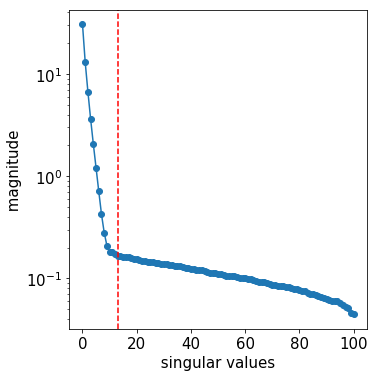

In [4]:
numpy.random.seed(0)
noise_level = 0.04
un = u + noise_level*std(u)*np.random.randn(u.shape[0],u.shape[1])
print(" shape of un ", un.shape)

FUn = un.reshape(u.shape[0],101)
uun,usn,uvn = np.linalg.svd(FUn, full_matrices = False)
dim = 81

# reconstructed
pylab.rcParams['figure.figsize'] = (5.5, 5.5)
plt.rcParams.update({'font.size': 15})
un = (uun[:,:dim].dot(np.diag(usn[:dim]).dot(uvn[:dim,:]))).reshape(u.shape[0],101)
semilogy(usn,'-o')
plt.xlabel(" singular values ")
plt.ylabel(" magnitude ")
count = 0
for i in range(1, 101):
    #print(i, usn[i]/usn[i-1])
    if(usn[i]/usn[i-1] >= 0.99):
        break
    count = count + 1
plt.axvline(x=count, color='r', linestyle='--')

In [7]:
non_linear = ['','u','u^2','u^3']
deriv      = ['','u_{x}','u_{xx}','u_{xxx}','u_{xxxx}']

description = ['' for i in range(20)]
for i in range(0, len(deriv)):
    for j in range(0, len(non_linear)):
        description[j+i*len(non_linear)] = non_linear[j] + deriv[i]

description_trunc = description[1:20]
        
for d in range(0, len(description_trunc)):
    print(d, description_trunc[d])

0 u
1 u^2
2 u^3
3 u_{x}
4 uu_{x}
5 u^2u_{x}
6 u^3u_{x}
7 u_{xx}
8 uu_{xx}
9 u^2u_{xx}
10 u^3u_{xx}
11 u_{xxx}
12 uu_{xxx}
13 u^2u_{xxx}
14 u^3u_{xxx}
15 u_{xxxx}
16 uu_{xxxx}
17 u^2u_{xxxx}
18 u^3u_{xxxx}


# Stability plots for Burgers 

In [1]:
# make sure you read the correct file 
# The file is indexed as follows
coefs_ihtd     = np.loadtxt('IHTd_Burgers_n0.04_N250_p19_dim15_B250.txt', dtype='double')
coefs_STR      = np.loadtxt('STR_Burgers_n0.04_N250_p19_dim15_B250.txt', dtype='double')
neg_log_stable_lambda    = np.loadtxt('lambda_n0.04_N250_p19_dim15_B250.txt', dtype='double')
d, alphas_size = coefs_ihtd.shape
print(" shape of ceofs_lasso ", coefs_ihtd.shape)

derv = ['u_{x}', 'u_{xx}','u_{xxx}','u_{xxxx}']
nonlinear = ['u','u^2','u^3']
pylab.rcParams['figure.figsize'] = (11, 5)

covar_1 = 4 #PP + 1
covar_2 = 7 #2*PP + 1

plt.subplot(1,2,1)
#plt.subplot(fig_count,1,count)
for i in range(0, d):
    if(i == covar_1):
        plt.plot(neg_log_stable_lambda, coefs_ihtd[i,:],'-o',color='red')
    elif(i == covar_2):
        plt.plot(neg_log_stable_lambda, coefs_ihtd[i,:],'-o',color='green')
    else:
        plt.plot(neg_log_stable_lambda, coefs_ihtd[i,:],'--',color='black')
        
plt.legend(loc='best', prop={'size':13})
plt.legend(loc='best')
plt.rcParams.update({'font.size': 13})
plt.text(0.1, 0.85,'$\Pi_{th}=0.8$', color='red')
plt.axhline(y=0.8, color='b', linestyle='-')
plt.xlabel(" -$log(\lambda^*)$ ")
plt.ylabel(" importance measures $(\Pi)$ ")
#plt.ylabel(" coefficients ")
        
plt.subplot(1,2,2)
#plt.subplot(fig_count,1,count)
for i in range(0, d):
    if(i == covar_1):
        plt.plot(neg_log_stable_lambda, coefs_STR[i,:],'-o',color='red')
    elif(i == covar_2):
        plt.plot(neg_log_stable_lambda, coefs_STR[i,:],'-o',color='green')
    else:
        plt.plot(neg_log_stable_lambda, coefs_STR[i,:],'--',color='black')
        

plt.legend(loc='best')
plt.rcParams.update({'font.size': 13})
plt.text(0.2, 0.85,'$\Pi_{th}=0.8$', color='red')
plt.axhline(y=0.8, color='b', linestyle='-')
plt.xlabel(" -$log(\lambda^*)$ ")
plt.ylabel(" importance measures $(\Pi)$ ")

NameError: name 'np' is not defined

# Model fitting

In [9]:
np.random.seed(60)  # same seed used in the simulations
reduced_size = 250  # N 
noise_level = 0.04  # sigma 
un = u + noise_level * np.std(u) * np.random.randn(u.shape[0],u.shape[1])

FUn = un.reshape(u.shape[0],101)
uun,usn,uvn = np.linalg.svd(FUn, full_matrices = False)
dim = 20 #u.shape[1]

# reconstructed
un = (uun[:,:dim].dot(np.diag(usn[:dim]).dot(uvn[:dim,:]))).reshape(u.shape[0],101)

DD = 4
PP = 3
inv_eps = 100
vector_B = np.array([ PP+1, 2*PP+1 ])

#u_t, X, description = build_linear_system(un, dt, dx, D=DD, P=PP, time_diff = 'FD', space_diff = 'FD')
u_t, X, description = build_linear_system(un, dt, dx, D=DD, P=PP, time_diff = 'poly', space_diff = 'poly',deg_x = 5, deg_t = 5, width_x = 10, width_t = 10)
description_trunc, X_no_intercept = remove_intercept(X, description) # changed from X to Rn

 The value of D is changed to 4  4
i : 1 u
i : 2 u^2
i : 3 u^3
i : 4 u_{x}
i : 5 uu_{x}
i : 6 u^2u_{x}
i : 7 u^3u_{x}
i : 8 u_{xx}
i : 9 uu_{xx}
i : 10 u^2u_{xx}
i : 11 u^3u_{xx}
i : 12 u_{xxx}
i : 13 uu_{xxx}
i : 14 u^2u_{xxx}
i : 15 u^3u_{xxx}
i : 16 u_{xxxx}
i : 17 uu_{xxxx}
i : 18 u^2u_{xxxx}
i : 19 u^3u_{xxxx}
 shape of the truncated description  19
shape 19116 20
shape of no_intercept (19116, 19)


/lustre/projects/jupyterhub/maddukon/Data_driven/Stability_selection_results /PDE-STRIDE/Iterative_solvers_l0_l1.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  X_no_intercept[:,i-1] = X[:,i]


In [10]:
np.random.seed(60)
ordered_reduced = np.arange(0, len(u_t))
np.random.shuffle(ordered_reduced)
X_reduced = np.zeros((reduced_size, len(description_trunc)))
y_reduced = np.zeros((reduced_size, 1))
    
for i in range(0, reduced_size):
    X_reduced[i,:] = X_no_intercept[int(ordered_reduced[i]),:]
    y_reduced[i]   = u_t[int(ordered_reduced[i])]  # changed 

X_fit = np.zeros((X_reduced.shape[0],2))
X_fit[:,0] = X_reduced[:,4]
X_fit[:,1] = X_reduced[:,7]

desc_fit = [description_trunc[4], description_trunc[7]]
print(" shape of X_fit ", X_fit.shape)
coeff_fit = np.linalg.lstsq(X_fit, y_reduced)[0]
for i in range(0, len(coeff_fit)):
    print(desc_fit[i],coeff_fit[i])

 shape of X_fit  (250, 2)
uu_{x} [-0.96935341]
u_{xx} [0.09507548]


/sw/apps/python3/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
/sw/apps/python3/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
